<a href="https://colab.research.google.com/github/pb-roshith/Deep-CNN-Autoencoder---Denoising-Image/blob/main/Deep_CNN_Autoencoder_Denoising_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 116.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 119.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.9 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
x_train_noisy[0]

array([[-5.31849859e-01,  2.99683018e-01,  4.04774302e-01,
        -1.27343808e-01, -9.90427674e-01,  1.09558682e+00,
        -5.72915486e-01,  1.10268445e+00,  9.48835532e-02,
         1.27140105e-01,  6.98857020e-01,  1.25238233e+00,
        -4.00403862e-01, -3.54380219e-01, -1.03698647e-01,
         1.55057055e-01,  6.21901705e-01, -8.65343349e-01,
        -4.45573248e-01,  5.73099089e-01,  1.35522500e+00,
         1.60199407e-02, -3.61255170e-01, -7.25965724e-01,
        -1.74271758e-02, -1.86328274e-01, -7.97526250e-01,
         5.33659051e-01],
       [-2.68571191e-01,  5.06105098e-01, -7.08827204e-01,
        -3.07108971e-01,  6.34596034e-01,  1.05937277e+00,
         1.81007254e+00, -3.47529046e-01,  1.60585918e-01,
         4.50092787e-01,  3.30400308e-02, -5.01777178e-02,
        -1.50984987e-02,  1.41914364e+00,  1.04093804e+00,
        -1.05340859e+00,  4.99783305e-01,  5.49782860e-01,
         3.82770766e-01,  5.05318369e-02,  6.72555845e-01,
        -8.00299678e-01, -1.32

In [9]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [11]:
x_train_noisy[0]

array([[0.        , 0.29968302, 0.4047743 , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.09488355, 0.1271401 ,
        0.69885702, 1.        , 0.        , 0.        , 0.        ,
        0.15505706, 0.6219017 , 0.        , 0.        , 0.57309909,
        1.        , 0.01601994, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.53365905],
       [0.        , 0.5061051 , 0.        , 0.        , 0.63459603,
        1.        , 1.        , 0.        , 0.16058592, 0.45009279,
        0.03304003, 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.49978331, 0.54978286, 0.38277077, 0.05053184,
        0.67255584, 0.        , 0.        , 0.01838719, 0.38027281,
        0.33032482, 0.        , 0.3892335 ],
       [0.14593621, 0.04761089, 0.53687492, 0.58034068, 0.14633553,
        0.11885894, 0.49882077, 0.86603382, 0.        , 0.72740518,
        0.        , 0.        , 0.58946071, 1.        , 1.        ,
        0.        , 0.7952

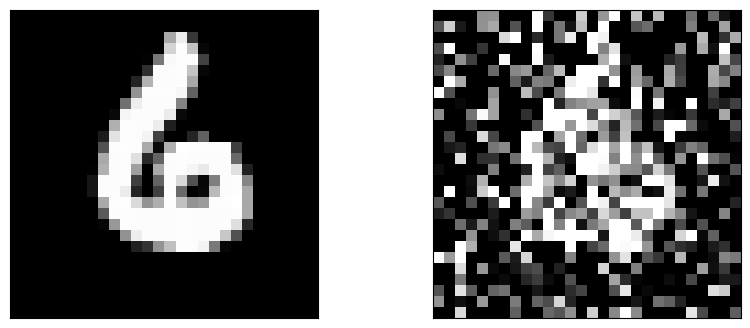

In [15]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10,4))

ax=plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax=plt.subplot(1, 2, 2)
plt.imshow(x_test_noisy[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

In [16]:
model = Sequential([
    # encoder
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    # decoder
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    # output
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 181s 761ms/step - loss: 0.3442 - val_loss: 0.1462
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 179s 762ms/step - loss: 0.1441 - val_loss: 0.1369
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 175s 747ms/step - loss: 0.1353 - val_loss: 0.1301
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 180s 767ms/step - loss: 0.1309 - val_loss: 0.1268
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 178s 759ms/step - loss: 0.1276 - val_loss: 0.1244
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 179s 760ms/step - loss: 0.1252 - val_loss: 0.1222
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 178s 758ms/step - loss: 0.1234 - val_loss: 0.1210
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 177s 754ms/step - loss: 0.1220 - val_loss: 0.1195
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 176s 751ms/step - loss: 0.1206 - val_loss: 0.1191
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 179s 760ms/step - loss: 0.1198 - val_loss: 0.1179


In [20]:
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


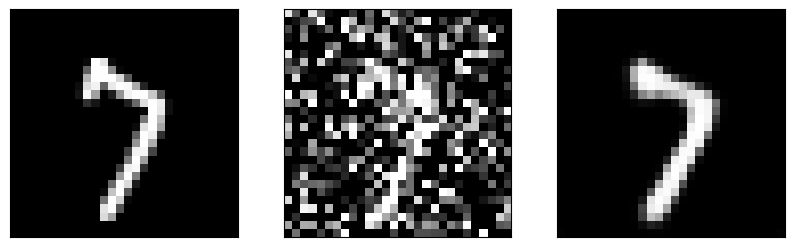

In [23]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10,4))

ax=plt.subplot(1, 3, 1)
plt.imshow(x_test[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax=plt.subplot(1, 3, 2)
plt.imshow(x_test_noisy[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax=plt.subplot(1, 3, 3)
plt.imshow(pred[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()